<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
### Estudiante : Ilvar Dario Sanabria
### Código : 616201058

`Fecha de entrega: Octubre 31, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [3]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [4]:
# Cargar datos
path = 'c:/tmp/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

Vemos si los datos estan balanceados

In [5]:
data.stars.value_counts(normalize=True)

5    0.233
1    0.220
3    0.201
4    0.176
2    0.170
Name: stars, dtype: float64

In [6]:
# Datos de entrenamiento y test
train,test = train_test_split(data, test_size = 0.2, random_state=26102020)

In [7]:
# Vemos el numero de registro de los dos sets (train,test)
print(f"El conjunto de datos de train tiene {train.shape[0]} registros")
print(f"El conjunto de datos de test tiene {test.shape[0]} registros")

El conjunto de datos de train tiene 800 registros
El conjunto de datos de test tiene 200 registros


###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [8]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect_cl = TfidfVectorizer(preprocessor=pre_procesado)

In [9]:
X_train = tfidf_vect_cl.fit_transform(train.review_body.values)
y_train = train.product_category.values
 
X_test = tfidf_vect_cl.transform(test.review_body.values)
y_test = test.product_category.values

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [10]:
logreg = LogisticRegression(class_weight='balanced')

In [11]:
# Entrenamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [12]:
# Hacemos las predicciones para los datos de prueba (test)
ypred = logreg.predict(X_test)


In [13]:
ypred

array(['video_games', 'video_games', 'video_games', 'jewelry',
       'video_games', 'video_games', 'jewelry', 'video_games', 'jewelry',
       'jewelry', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'video_games', 'jewelry', 'video_games', 'video_games',
       'video_games', 'jewelry', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'video_games', 'jewelry', 'jewelry', 'video_games',
       'video_games', 'video_games', 'video_games', 'video_games',
       'video_games', 'jewelry', 'jewelry', 'video_games', 'video_games',
       'jewelry', 'jewelry', 'video_games', 'video_games', 'jewelry',
       'jewelry', 'jewelry', 'jewelry', 'video_games', 'video_games',
       'jewelry', 'jewelry', 'video_games', 'jewelry', 'video_games',
       'jewelry', 'video_games', 'jewelry', 'video_games', 'video_games',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'jewelry',
       'video_games', 'jewelry', 'jewelry', 'video_games', 'video_games',
       'video_games', 'jewelr

In [14]:
print(f"Exactitud - Regresión Logística: {accuracy_score(y_test, ypred):>7.2f}")

Exactitud - Regresión Logística:    0.85


In [15]:
print("Regresión Logística")
print(classification_report(y_test, ypred))

Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.91      0.81      0.86       111
 video_games       0.79      0.90      0.84        89

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



###  `[BONUS: 3 pts]` Matriz de confusión

In [16]:
print("Regresión Logística")
print(confusion_matrix(y_test, ypred))

Regresión Logística
[[90 21]
 [ 9 80]]


Text(0.5, 1.0, 'Regresión Logística')

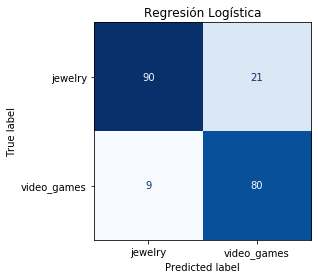

In [17]:
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues').im_.colorbar.remove()
plt.title("Regresión Logística")

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

In [18]:
tfidf_vect_cl.vocabulary_.items()

dict_items([('compré', 597), ('pensando', 2204), ('llegaría', 1743), ('día', 1014), ('lanzamiento', 1684), ('regalo', 2620), ('importante', 1541), ('sorpresa', 2870), ('compañía', 565), ('correos', 676), ('dice', 912), ('entregado', 1109), ('recibido', 2564), ('apaño', 189), ('mal', 1795), ('hecho', 1490), ('pena', 2197), ('haga', 1479), ('disminuya', 949), ('confianza', 618), ('amazon', 145), ('pasaba', 2164), ('puesto', 2456), ('reclamación', 2572), ('supone', 2912), ('llamar', 1724), ('ayer', 263), ('aún', 272), ('esperando', 1177), ('uso', 3093), ('exigente', 1234), ('funciona', 1351), ('mas', 1836), ('correctamente', 672), ('regalé', 2623), ('hija', 1495), ('momento', 1940), ('ninguna', 2019), ('pega', 2185), ('supongo', 2913), ('gamers', 1379), ('usarán', 3090), ('cosas', 685), ('mejores', 1861), ('des', 827), ('luego', 1775), ('precio', 2361), ('buscaba', 355), ('reducido', 2603), ('quejar', 2499), ('razón', 2548), ('transporte', 3043), ('parte', 2157), ('caja', 387), ('venía', 

In [19]:
# Se invierte el orden del index y del valor

vocab = {value:key for key, value in tfidf_vect_cl.vocabulary_.items()}
vocab

{597: 'compré',
 2204: 'pensando',
 1743: 'llegaría',
 1014: 'día',
 1684: 'lanzamiento',
 2620: 'regalo',
 1541: 'importante',
 2870: 'sorpresa',
 565: 'compañía',
 676: 'correos',
 912: 'dice',
 1109: 'entregado',
 2564: 'recibido',
 189: 'apaño',
 1795: 'mal',
 1490: 'hecho',
 2197: 'pena',
 1479: 'haga',
 949: 'disminuya',
 618: 'confianza',
 145: 'amazon',
 2164: 'pasaba',
 2456: 'puesto',
 2572: 'reclamación',
 2912: 'supone',
 1724: 'llamar',
 263: 'ayer',
 272: 'aún',
 1177: 'esperando',
 3093: 'uso',
 1234: 'exigente',
 1351: 'funciona',
 1836: 'mas',
 672: 'correctamente',
 2623: 'regalé',
 1495: 'hija',
 1940: 'momento',
 2019: 'ninguna',
 2185: 'pega',
 2913: 'supongo',
 1379: 'gamers',
 3090: 'usarán',
 685: 'cosas',
 1861: 'mejores',
 827: 'des',
 1775: 'luego',
 2361: 'precio',
 355: 'buscaba',
 2603: 'reducido',
 2499: 'quejar',
 2548: 'razón',
 3043: 'transporte',
 2157: 'parte',
 387: 'caja',
 3144: 'venía',
 2789: 'serios',
 2536: 'rasguños',
 388: 'cajas',
 1648: 'j

In [20]:
logreg.coef_[0]

array([-0.13201293, -0.24227706, -0.1287791 , ...,  0.08483349,
       -0.21345633,  0.16178353])

In [21]:
# calificación de las palabras, usado para calificar un texto como jewelry       
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))]

[('pulsera', -1.95),
 ('calidad', -1.95),
 ('bonito', -1.88),
 ('bonitos', -1.87),
 ('cadena', -1.78),
 ('foto', -1.68),
 ('bonita', -1.61),
 ('plata', -1.5),
 ('pendientes', -1.4),
 ('pequeño', -1.19),
 ('fina', -1.15),
 ('tamaño', -1.1),
 ('colgante', -1.08),
 ('bonitas', -1.05),
 ('cierre', -1.03),
 ('grandes', -1.01),
 ('collar', -0.99),
 ('demasiado', -0.98),
 ('gracias', -0.9),
 ('recibido', -0.89),
 ('queda', -0.89),
 ('pequeños', -0.88),
 ('preciosa', -0.85),
 ('enseguida', -0.83),
 ('llegado', -0.81),
 ('piedra', -0.79),
 ('rosa', -0.69),
 ('llego', -0.65),
 ('mala', -0.64),
 ('presentación', -0.63),
 ('ve', -0.63),
 ('aun', -0.63),
 ('anillo', -0.63),
 ('llegaron', -0.62),
 ('fino', -0.61),
 ('fotos', -0.6),
 ('diseño', -0.59),
 ('seguro', -0.57),
 ('niñas', -0.57),
 ('feo', -0.57),
 ('pequeña', -0.57),
 ('color', -0.56),
 ('persona', -0.55),
 ('dorado', -0.55),
 ('elegante', -0.53),
 ('rompió', -0.52),
 ('dedo', -0.52),
 ('encantada', -0.51),
 ('tal', -0.51),
 ('corresponde'

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [65]:
tfidf_vect_gr = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect_gr.fit_transform(data.review_body.values)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect_gr.get_feature_names())

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

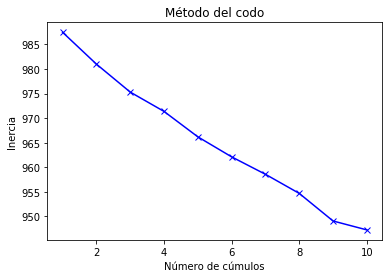

In [66]:
ks = []
k_inertia = []
 
for k in range(1,11):
     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)

plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-')

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [109]:
k = 4
model = KMeans(n_clusters=k,max_iter=1000)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

### Imprimimos los cluster para observar su contenido

In [110]:
from colorama import init, Fore, Back, Style

In [114]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

print(f"{Back.BLACK}{Fore.WHITE}CLUSTERS:\n{Fore.RESET}{Back.RESET}")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect_gr.get_feature_names()

for i in range(k):
    print(f"{Back.BLACK+Fore.WHITE}Cluster {i}:{Fore.RESET+Back.RESET}")
    print(f"COUNT  {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"{Back.BLACK+Fore.WHITE}TERMS {Fore.RESET+Back.RESET}", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{terms[ind]}', end=" "),
    print(f"\n{Back.BLACK+Fore.WHITE}REPRESENTATIVE COMMENTS{Fore.RESET+Back.RESET}")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_body'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0:
COUNT  142 comments (14.20% of the data)
TERMS  calidad precio buena bien mala puede pedir compra bastante demasiado cumple gustado baja cadena relación regalo cierre color producto bonito 
REPRESENTATIVE COMMENTS
* Calidad precio buena
* Calidad precio buena
* Calidad precio muy buena


Cluster 1:
COUNT  127 comments (12.70% of the data)
TERMS  perfecto llegó tiempo llegado día llego juego artículo esperaba rápido todavía envío gracias sido producto entregado llegar perfectamente funciona pedido 
REPRESENTATIVE COMMENTS
* Llegó a tiempo y en perfecto estado
* Perfecto y en tiempo
* Todo en perfecto estado


Cluster 2:
COUNT  679 comments (67.90% of the data)
TERMS  bien juego bonito si producto foto regalo mas bonitos solo plata parece queda aunque mando jugar mal caja pulsera bastante 
REPRESENTATIVE COMMENTS
* Bonito fue para un regalo y bien
* Esta bien,fue un regalo
* Acerté con el regalo, lo recomiendo queda muy chulo. El tamaño del colgante está bien justo 

In [115]:
clusters = {0:'jewelry',
            1:'Envios',
            2:'Calidad',
            3:'video_games'}

data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
759,es_0555580,product_es_0124892,reviewer_es_0529546,5,"Pendientes bonitos y baratos, no se ponen negr...",Pendientes.,es,jewelry,Calidad
691,es_0777883,product_es_0601831,reviewer_es_0623253,5,El producto en buen estado. Perfecto.,Perfecto,es,video_games,video_games
197,es_0267859,product_es_0915571,reviewer_es_0346820,5,"Todo perfecto, es la edición PAL alemana pero ...",M cortecero,es,video_games,Envios
402,es_0168151,product_es_0148597,reviewer_es_0392956,3,El artículo cumple con las expectativas,Buen material,es,video_games,Envios
739,es_0111402,product_es_0544941,reviewer_es_0269050,5,"Fue para un regalo. Y a él le encanto,.Es igua...",Regalo,es,video_games,Calidad


###  `[BONUS: 3 pts]` Visualización usando PCA

In [118]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'jewelry': 'blue',
             'Envios': 'black',
             'Calidad': 'red',
             'video_games': 'green'}

cols = data['cluster'].map(colorsIdx)

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=cols)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [122]:
prueba = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

# transformar con tfidf usado para clasificación
pred_cl = tfidf_vect_cl.transform(prueba)

# transformar con tfidf usado para agrupación
pred_gr = tfidf_vect_gr.transform(prueba)

### Resultado para clasificación

In [123]:
print(logreg.predict(pred_cl))

['video_games' 'jewelry']


### Resultado para agrupación

In [124]:
print(model.predict(pred_gr))
pred=pd.DataFrame(model.predict(pred_gr))
pred[0] = pred[0].apply(lambda val: clusters[val])
pred

[2 0]


,0
0,Calidad
1,jewelry


### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 
Rta: El modelo de clasificación predice mejor
- ¿Cuál modelo se demoró más en entrenar? 
Rta: el modelo de agrupamiento se demora más
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
Rta.no es facil determinar la estructura, pues usando 4 clusters surgieron estructuras latentes con temas como calidad y envio de los productos. Es muy dificil clasificar los reviews por joyas, ya que existen reviews de ellas , pero no se nombran como tal sino que se nombran los productos (aretes, pulseras, etc)
- ¿Alguna otra observación?
Dependiendo los temas y el contenido de los textos , puede emplearse un modelo u otro. En este caso en particular los datos etiquetados funcionan ,mejor que los no etiquetados  